# 2) (16 балів) Узяти будь-які дві нелінійні регресійні моделі (з ЛР №6), які не наведені у файлах з прикладами (які прикріплені нижче)

In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir

import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history

from sklearn.model_selection import train_test_split


2025-05-17 16:03:37,876 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best:   0%|          |0/1000C:\Users\dadmo\AppData\Local\Temp\ipykernel_13572\1116099347.py:18: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred)**2)
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1.66e-6
2025-05-17 16:04:09,933 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6614604280492085e-06, best pos: [ 0.37602312  2.00724193 -1.53656787  0.01300853  0.02185148]


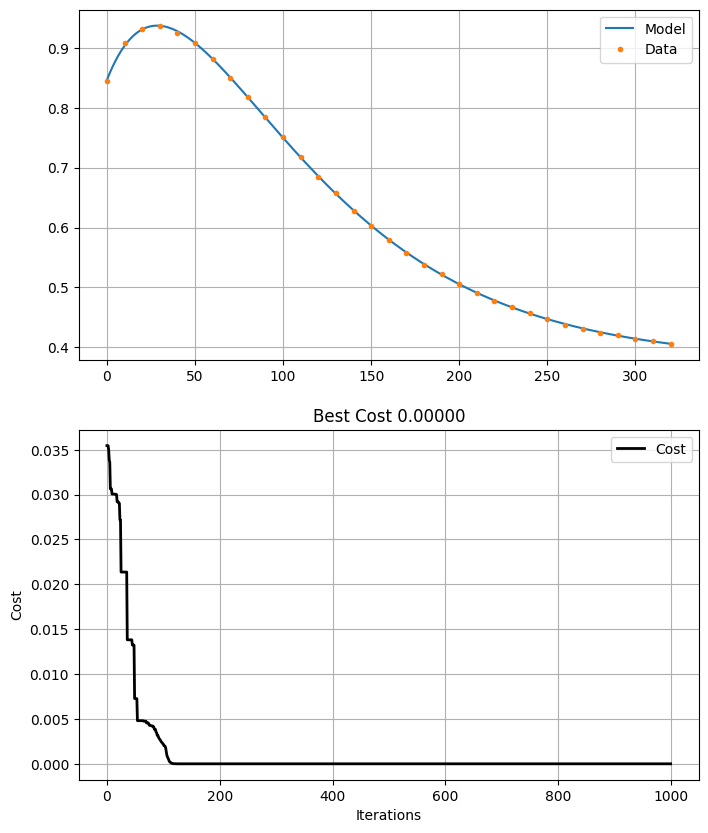

2025-05-17 16:04:10,215 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.3e-5 
2025-05-17 16:04:42,447 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.297105603594855e-05, best pos: [ 0.31152931  0.93153186 -0.40324824  0.00757089  0.04398577]
2025-05-17 16:04:42,449 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=7.13e-7
2025-05-17 16:05:13,737 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.129543559565647e-07, best pos: [ 0.37519661  2.14213767 -1.66355556  0.01315519  0.02113521]


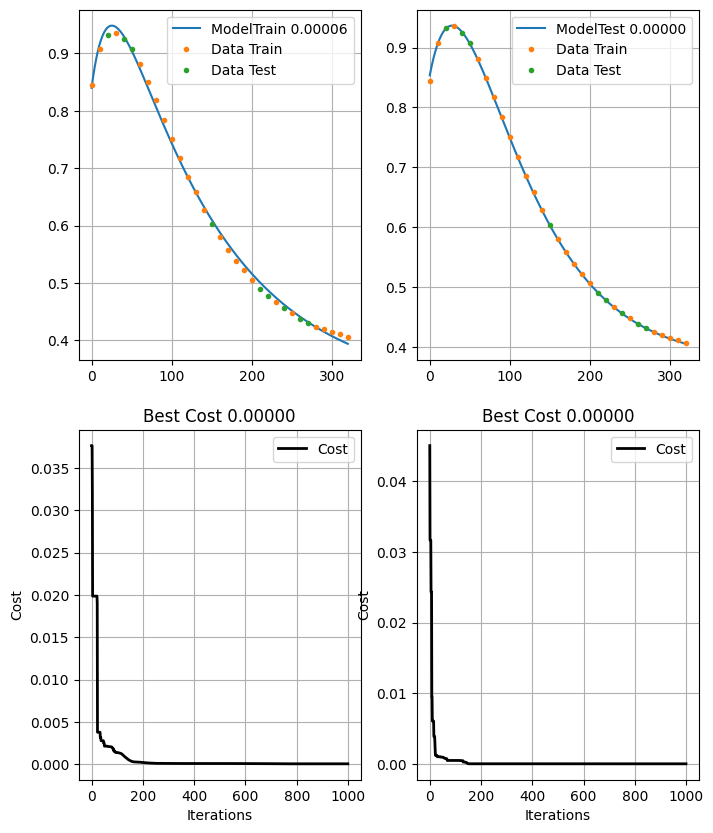

2025-05-17 16:05:14,314 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.00478
2025-05-17 16:05:40,426 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.004783222650089972, best pos: [4.31972476e+02 3.06679577e-04]


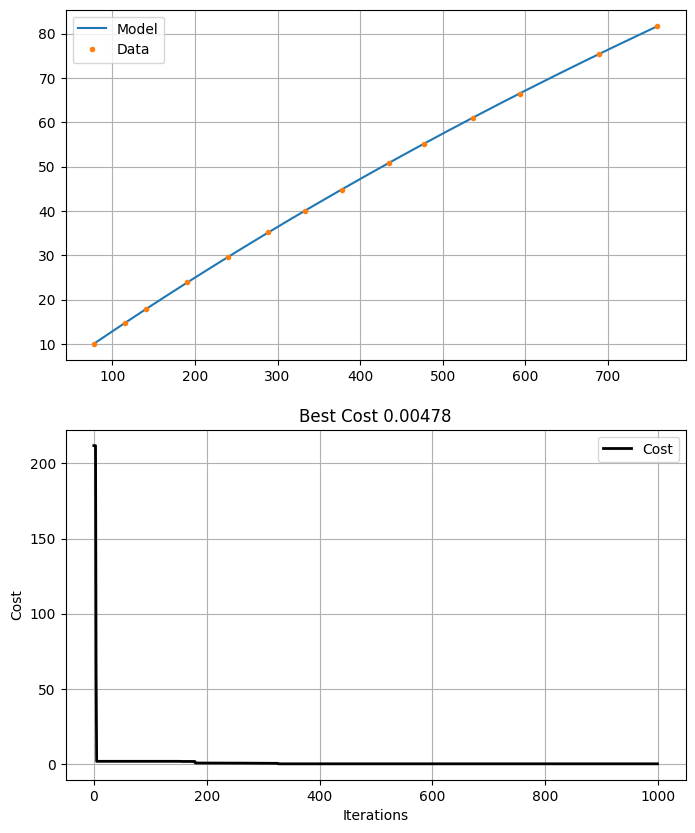

2025-05-17 16:05:40,679 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0119
2025-05-17 16:06:06,941 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.011947413637353603, best pos: [4.2873876e+02 3.0896302e-04]
2025-05-17 16:06:06,944 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.0675
2025-05-17 16:06:32,884 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.06747377445041775, best pos: [3.58441384e+02 3.80957930e-04]


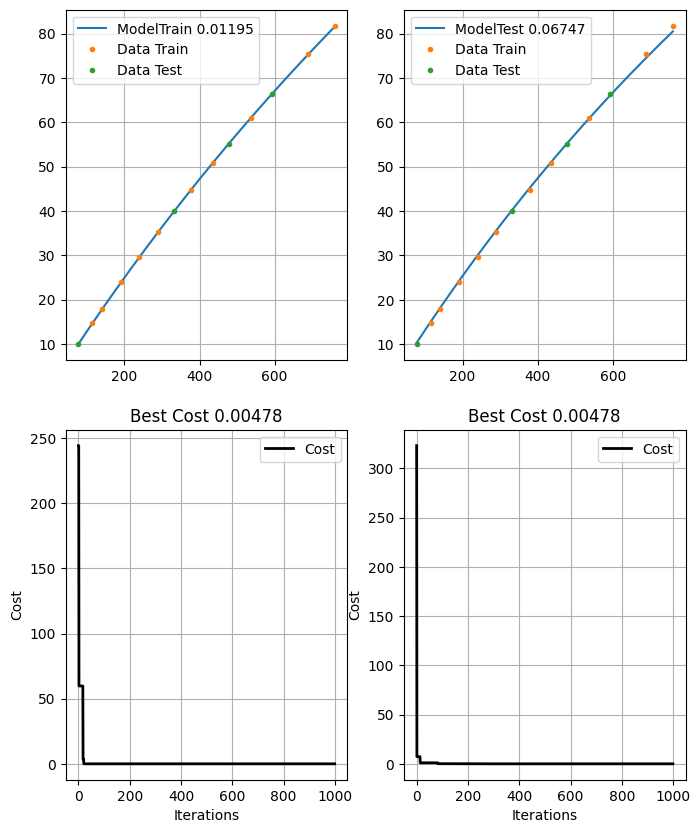

In [89]:
path = "."
lab_name = "Lab8_9"
if lab_name in listdir(path):
    path += "/" + lab_name
    if "Data" in listdir(path):
        path += "/Data"
        datas_path = [path + "/" + data for data in listdir(path)]
    else:
        raise Exception(f"Data directory in {lab_name} directory not found")
else:
    raise Exception(f"{lab_name} directory not found")

def var9(X, dat):
    b1, b2, b3, b4, b5 = X
    return b1 + b2 * np.exp(-b4 * dat) + b3 * np.exp(-b5 * dat)

def error(y_pred, y):
    return np.mean((y - y_pred)**2)

var9_limits = [[0, 10], [0, 5], *[[-2, 2] for _ in range(3)]]
var11_limits = [[100, 1000], [0, 1]]

def var11(X, dat):
    b1, b2 = X
    return (b1 * b2 * dat) / (1 + b2 * dat)

lts = [9, 11]
for i in lts:
    for data_path in datas_path:
            data = pd.read_excel(data_path, sheet_name=f"Var{i:02}")
            dat = data.to_numpy()
            y, x = dat[:, 0], dat[:, 1]
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

            def funct(X):
                fitness = np.apply_along_axis(eval(f"var{i}"), 1, X, x)
                return np.apply_along_axis(error, 1, fitness, y)

            iterations = 1000
            pop_size = 1000

            options = {'c1': 0.5, 'c2': 0.5, 'w':0.8}
            min_bound = [mn[0] for mn in eval(f"var{i}_limits")]
            max_bound = [mx[1] for mx in eval(f"var{i}_limits")]
            bounds = (min_bound, max_bound)
            optimizer = ps.single.GlobalBestPSO(n_particles=pop_size, dimensions=len(min_bound), options=options, bounds=bounds)
            optimizer_n = ps.single.GlobalBestPSO(n_particles=pop_size, dimensions=len(min_bound), options=options, bounds=bounds)
            optimizer_t = ps.single.GlobalBestPSO(n_particles=pop_size, dimensions=len(min_bound), options=options, bounds=bounds)
            cost, pos = optimizer.optimize(funct, iters=iterations)

            x_projection = np.linspace(np.min(x), np.max(x), int(1e3))
            y_projection = eval(f"var{i}")(pos, x_projection)

            fig, [ax1, ax2] = plt.subplots(2, figsize=(8, 10))

            ax1.plot(x_projection, y_projection, label="Model")
            ax1.plot(x, y, '.', label="Data")
            ax1.grid(True)
            ax1.legend()
            
            plot_cost_history(cost_history=optimizer.cost_history, ax=ax2, title=f"Best Cost {cost:.5f}")
            ax2.grid(True)
            plt.show()

            def funct_n(X):
                fitness = np.apply_along_axis(eval(f"var{i}"), 1, X, x_train)
                return np.apply_along_axis(error, 1, fitness, y_train)

            def funct_t(X):
                fitness = np.apply_along_axis(eval(f"var{i}"), 1, X, x_test)
                return np.apply_along_axis(error, 1, fitness, y_test)

            cost_n, pos_n = optimizer_n.optimize(funct_n, iters=iterations)
            cost_t, pos_t = optimizer_t.optimize(funct_t, iters=iterations)

            y_projection_n = eval(f"var{i}")(pos_n, x_projection)
            y_projection_t = eval(f"var{i}")(pos_t, x_projection)

            fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(8, 10))

            ax1.plot(x_projection, y_projection_n, label=f"ModelTrain {cost_n:.5f}")
            ax1.plot(x_train, y_train, '.', label="Data Train")
            ax1.plot(x_test, y_test, '.', label="Data Test")
            ax1.grid(True)
            ax1.legend()
            
            ax2.plot(x_projection, y_projection_t, label=f"ModelTest {cost_t:.5f}")
            ax2.plot(x_train, y_train, '.', label="Data Train")
            ax2.plot(x_test, y_test, '.', label="Data Test")
            ax2.grid(True)
            ax2.legend()

            plot_cost_history(cost_history=optimizer_n.cost_history, ax=ax3, title=f"Best Cost {cost:.5f}")
            plot_cost_history(cost_history=optimizer_t.cost_history, ax=ax4, title=f"Best Cost {cost:.5f}")
            ax3.grid(True)
            ax4.grid(True)

            plt.show()
